In [47]:
%matplotlib widget

import os

os.chdir('/home/ubuntu/nndl-project/')

from src.dataset import *
from torch.utils.data import DataLoader
import pandas as pd
from src.models.voxnet import * # imports VoxNet
import matplotlib.pyplot as plt
from torch.nn.functional import one_hot

metadata_path = '/home/ubuntu/nndl-project/data/modelnet10/metadata.csv'
orientation_classes_path = '/home/ubuntu/nndl-project/data/modelnet10/orientation_classes.csv'

LOAD_MODEL_PATH='/home/ubuntu/nndl-project/trained_models/model_20230130_225005_2'

N=30

In [62]:
# Create datasets for training & validation
training_set = ModelNetDataset(metadata_path,N,'train',orientation_classes_path=orientation_classes_path)
validation_set = ModelNetDataset(metadata_path,N,'test',orientation_classes_path=orientation_classes_path)

N_SAMPLES=10

# Create data loaders for our datasets
training_loader = DataLoader(training_set, batch_size=N_SAMPLES, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=N_SAMPLES, shuffle=False)

In [63]:
model = VoxNet()
model.load_state_dict(torch.load(LOAD_MODEL_PATH))

<All keys matched successfully>

In [64]:
vox,orientation,label = next(iter(validation_loader))
label_pred,orientation_pred=model(vox.float())

In [70]:
label_pred.argmax(1)

tensor([7, 7, 1, 7, 1, 1, 1, 0, 1, 1])

In [55]:


label_pred=label_pred.argmax().item()
label=label[0].item()

rotation_pred = validation_set.orientation_classes[validation_set.orientation_classes['orientation_class'] == label_pred]['rot_z']
rotation = validation_set.orientation_classes[validation_set.orientation_classes['orientation_class'] == label]['rot_z']

In [61]:
int_to_label = dict(validation_set.metadata.groupby(['label','label_str']).groups.keys())

print("True label and orientation:")
print(int_to_label[label])
print("{} deg z".format(rotation_pred.values[0]))
print("Predicted label:")
print(int_to_label[label_pred])
print("{} degrees z rotation".format(rotation.values[0]))

True label and orientation:
desk
90 deg z
Predicted label:
chair
0 degrees z rotation


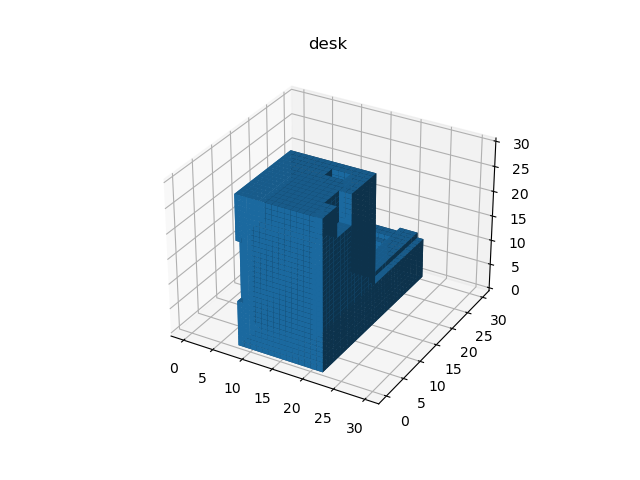

In [46]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(vox[0,0])
ax.set_title(int_to_label[label])
plt.show()